# Project 3 - Ensemble Techniques

**Data Description**: The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

**Domain**: Banking

**Context**: Leveraging customer information is paramount for most businesses. In the case of a bank, attributes of customers like the ones mentioned below can be crucial in strategizing a marketing campaign when launching a new product.

**Attribute Information**
* **`age`**: age at the time of call
* **`job`**: type of job
* **`marital`**: marital status
* **`education`**: education background at the time of call
* **`default`**: has credit in default?
* **`balance`**: average yearly balance, in euros (numeric)
* **`housing`**: has housing loan?
* **`loan`**: has personal loan?
* **`contact`**: contact communication type
* **`day`**: last contact day of the month (1 -31)
* **`month`**: last contact month of year ('jan', 'feb', 'mar', ..., 'nov', 'dec')
* **`duration`**: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration = 0 then Target = 'no'). Yet, the duration is not known before a call is performed. Also, after the end of the call Target is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
* **`campaign`**: number of contacts performed during this campaign and for this client (includes last contact)
* **`pdays`**: number of days that passed by after the client was last contacted from a previous campaign
* **`previous`**: number of contacts performed before this campaign and for this client
* **`poutcome`**: outcome of the previous marketing campaign
* **`target`**: has the client subscribed a term deposit? ('yes', 'no')

**Learning Outcomes**
* Exploratory Data Analysis
* Preparing the data to train a model
* Training and making predictions using an Ensemble Model
* Tuning an Ensemble model

## Table of Contents
* [Import Packages](#packages)
* [Reading the data as a dataframe and print the first five rows](#reading)
* [Get info of the dataframe columns](#info)
    * [Observation 1 - Dataset shape](#o1)
* [Exploratory Data Analysis](#eda)
    * [Five point summary of numerical attributes and check unique values in 'object' columns](#5point)
        * [Observation 2 - information on the type of variable and min-max values](#o2)
        * [Observation 3 - Descriptive statistics for the numerical variables](#o3)
    * [Checking the distribution of target variable](#target)
        * [Observation 4 - Distribution of target variable](#o4)
    * [Univariate and Bivariate Visualization](#unibi)
        * [Observation 5 - Comments from categorical columns](#o5)
    * [Check outlier and distribution for numerical columns and also plot it's relation with target variable](#outlier)
        * [Observation 6 - Comments from numerical columns](#o6)
    * [Print categorical and numerical columns list, remove outliers with upper and lower percentile values being 99 and 1, respectively and get dummies](#dummies)
    * [Use MICE imputer to handled outliers that were filled with in the earlier step](#mice)
        * [Observation 7 - Observation after MICE](#o7)
    * [Checking whether count of 0 in previous column is equal to count of -1 in pdays column](#pdays)
        * [Observation 8 - pdays and previous](#o8)
    * [Multivariate visualization](#multi)
        * [Check scattermatrix](#scatter)
        * [Correlation matrix](#corr)
            * [Observation 9 - Correlation Matrix](#o9)
    * [Creating age groups and check relation with balance and target; also with campaign and target](#age)
        * [Observation 10 - Comments](#o10)
* [Modelling](#modelling)
    * [Dummy Classifier -- Baseline Model](#dummy)
    * [Standard Models](#sm)
        * [Logistic Regression](#lr)
        * [k-Nearest Neighbor Classifier](#knn)
        * [Naive Bayes Classifier](#nb)
        * [Oversampling and Naive Bayes](#onb)
        * [Oversampling and Logistic Regression](#olr)
    * [Ensemble Techniques](#et)
        * [Decision Tree Classifier](#dt)
        * [Bagging, AdaBoost, Gradient Boosting Classifier](#bag)
        * [Oversampling and AdaBoost Classifier](#oa)
        * [Random Forest Classifier](#rf)
        * [Oversampling and Random Forest Classifier](#orf)
* [Comparing model results](#mr)
* [Conclusion](#conclusion)

<a id='packages'></a>
### Import Packages

In [1]:
# Basic packages
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
from scipy import stats; from scipy.stats import zscore, norm, randint
import matplotlib.style as style; style.use('fivethirtyeight')
import plotly.express as px
%matplotlib inline

# Impute and Encode
from sklearn.preprocessing import LabelEncoder
from impyute.imputation.cs import mice

# Modelling - LR, KNN, NB, Metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, recall_score, precision_score
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, BaggingClassifier, VotingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.dummy import DummyClassifier
from sklearn.metrics import make_scorer

# Oversampling
from imblearn.over_sampling import SMOTE

# Suppress warnings
import warnings; warnings.filterwarnings('ignore')

# Visualize Tree
from sklearn.tree import export_graphviz
from IPython.display import Image
from os import system

# Display settings
pd.options.display.max_rows = 10000
pd.options.display.max_columns = 10000

random_state = 42
np.random.seed(random_state)

<a id='reading'></a>
### Reading the data as a dataframe and print the first five rows

In [2]:
# Reading the data as dataframe and print the first five rows
bank = pd.read_csv('bank-full.csv')
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


<a id='info'></a>
### Get info of the dataframe columns

In [3]:
# Get info of the dataframe columns
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
Target       45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


<a id='o1'></a>
#### Observation 1 - Dataset shape
Dataset has 45211 rows and 17 columns, with no missing values.

<a id='eda'></a>
## Exploratory Data Analysis
Performing exploratory data analysis on the bank dataset. Below are some of the steps performed:

* Get descriptive statistics including five point summary
* Check unique values in `object` columns
* Check distribution of Target column
* Count plot by Target for categorical columns (`job`, `marital`, `education`, `default`, `housing`, `loan`, `contact`, `day`, `month`, `poutcome`)
* Check outliers in each numerical columna (`age`, `balance`, `duration`, `campaign`, `pdays`, `previous`)
* Distribution of numerical columns (with and without outliers)
* Distribution of numerical columns for Target values (subscribed and didn`t subscribed to term deposit)
* Fill outliers with upper and lower percentile values being 99 and 1, respectively by nan values
* Frequency encoding for categorical columns with string values
* Convert type of categorical columns (`job`, `marital`, `education`, `default`, `housing`, `loan`, `contact`, `day`, `month`, `poutcome`, `Target`) to float for MICE training. Creating multiple imputations, as opposed to single imputations to `complete` datasets, accounts for the statistical uncertainty in the imputations. MICE algorithms works by running multiple regression models and each missing value is modeled conditionally depeding on the observed (non-missing) values.
* Get correlation matrix and check absolute correlation of independent variables with `Target`. Drop columns based on these.
* Create age groups and check if there is relation with balance and target, campaign and target.

<a id='5point'></a>
### Five point summary of numerical attributes and check unique values in 'object' columns

In [4]:
bank.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,45211,NaN,NaN,NaN,40.9362,10.6188,18,33,39,48,95
job,45211,12,blue-collar,9732,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital,45211,3,married,27214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,45211,4,secondary,23202,NaN,NaN,NaN,NaN,NaN,NaN,NaN
default,45211,2,no,44396,NaN,NaN,NaN,NaN,NaN,NaN,NaN
balance,45211,NaN,NaN,NaN,1362.27,3044.77,-8019,72,448,1428,102127
housing,45211,2,yes,25130,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan,45211,2,no,37967,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contact,45211,3,cellular,29285,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day,45211,NaN,NaN,NaN,15.8064,8.32248,1,8,16,21,31


In [5]:
columns = bank.loc[:, bank.dtypes == 'object'].columns.tolist()
for cols in columns:
    print(f'Unique values for {cols} is \n{bank[cols].unique()}\n')

Unique values for job is 
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']

Unique values for marital is 
['married' 'single' 'divorced']

Unique values for education is 
['tertiary' 'secondary' 'unknown' 'primary']

Unique values for default is 
['no' 'yes']

Unique values for housing is 
['yes' 'no']

Unique values for loan is 
['no' 'yes']

Unique values for contact is 
['unknown' 'cellular' 'telephone']

Unique values for month is 
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']

Unique values for poutcome is 
['unknown' 'failure' 'other' 'success']

Unique values for Target is 
['no' 'yes']



<a id='o2'></a>
#### Observation 2 - information on the type of variable and min-max values

##### Client info
* **Categorical**
	* **`job`**: Nominal. Includes type of job. 'blue-collar' is the most frequently occurring in the data.
	* **`marital`**: Nominal. Most of the clients are married in the dataset we have.
	* **`education`**: Ordinal. Most of the clients have secondary level education.
	* **`default`**: Binary. Most of clients don't have credit in default.
	* **`housing`**: Binary. Most of the clients have housing loan.
	* **`loan`**: Binary. Most of the clients don't have personal loan.

* **Numerical**
	* **`age`**: Continuous, ratio (has true zero, technically). Whether it's discrete or continuous depends on whether they are measured to the nearest year or not. At present, it seems it's discrete. Min age in the dataset being 18 and max being 95.
	* **`balance`**: Continuous, ratio. Range of average yearly balance is very wide from -8019 euros to 102127 euros.

##### Last contact info
* **Categorical**
	* **`contact`**: Nominal. Includes communication type with the client, most frequently use communication mode is cellular.
	* **`day`**: Ordinal. Includes last contact day of the month.
	* **`month`**: Ordinal. Includes last contact month of the year.

* **Numerical**
    * **`duration`**: Continuous, interval. Includes last contact duration in seconds. Min value being 0 and max value being 4918. It would be important to check is higher duration of call leading to more subscription.

##### This campaign info
* **Numerical**
	* **`campaign`**: Discrete, interval. Min number of contacts performed during this campaign being 1 and is also represents about 25% of the value and max being 63.

##### Previous campaign info
* **Categorical**
	* **`poutcome`**: Nominal. Includes outcome of the previous marketing campaign. Most occuring value being 'unknown'.

* **Numerical**
	* **`pdays`**: Continuous, interval. Min number of days that passed by after the client was last contacted from a previous campaign being -1 which may be dummy value for the cases where client wasn't contacted and max days being 63.
	* **`previous`**: Discrete, ratio. Min number of contacts performed before this campaign is 0 and max being 275.

##### Target
* **Categorical**
	* **`Target`**: Binary. Most occurring value being 'no' i.e. cases where the client didn't subscribe to the term deposit.

<a id='o3'></a>
#### Observation 3 - Descriptive statistics for the numerical variables
Descriptive statistics for the numerical variables (age, balance, duration, campaign, pdays, previous)
* **`age`**: Range of Q1 to Q3 is between 33 to 48. Since mean is slightly greater than median, we can say that age is right (positively) skewed.
* **`balance`**: Range of Q1 to Q3 is between 72 to 1428. Since mean is greater than median, we can say that balance is skewed towards right (positively).
* **`duration`**: Range of Q1 to Q3 is between 103 to 319. Since mean is greater than median, we can say that duration is right (positively) skewed.
* **`campaign`**: Range of Q1 to Q3 is between 1 to 3. Since mean is greater than median, we can say that campaign is right (positively) skewed.
* **`pdays`**: 75% of data values are around -1 which is a dummy value. It needs further check without considering the -1 value.
* **`previous`**: 75% of data values are around 0 which is a dummy value, maybe cases where client wasn't contacted. It needs further checks.

<a id='target'></a>
### Checking the distribution of target variable

In [6]:
display(bank['Target'].value_counts(), bank['Target'].value_counts(normalize = True)*100)

no     39922
yes     5289
Name: Target, dtype: int64

no     88.30152
yes    11.69848
Name: Target, dtype: float64

<a id='o4'></a>
#### Observation 4 - Distribution of target variable
Out of 45211 cases, only 5289 (=11.69%) are the cases where the client has subscribed to the term deposit.

In [7]:
# Replace values in some of the categorical columns
replace_values = {'education': {'unknown': -1, 'primary': 1, 'secondary': 2, 'tertiary': 3}, 'Target': {'no': 0, 'yes': 1},
                  'default': {'no': 0, 'yes': 1}, 'housing': {'no': 0, 'yes': 1}, 'loan': {'no': 0, 'yes': 1},
                  'month': {'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6, 
                            'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12}}

bank = bank.replace(replace_values)

In [8]:
# Convert columns to categorical types
columns.extend(['day'])
for cols in columns:
    bank[cols] = bank[cols].astype('category')

In [9]:
# Functions that will help us with EDA plot
def odp_plots(df, col):
    f,(ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15, 7.2))
    
    # Boxplot to check outliers
    sns.boxplot(x = col, data = df, ax = ax1, orient = 'v', color = 'darkslategrey')
    
    # Distribution plot with outliers
    sns.distplot(df[col], ax = ax2, color = 'teal', fit = norm).set_title(f'Distribution of {col} with outliers')
    
    # Removing outliers, but in a new dataframe
    upperbound, lowerbound = np.percentile(df[col], [1, 99])
    y = pd.DataFrame(np.clip(df[col], upperbound, lowerbound))
    
    # Distribution plot without outliers
    sns.distplot(y[col], ax = ax3, color = 'tab:orange', fit = norm).set_title(f'Distribution of {col} without outliers')
    
    kwargs = {'fontsize':14, 'color':'black'}
    ax1.set_title(col + ' Boxplot Analysis', **kwargs)
    ax1.set_xlabel('Box', **kwargs)
    ax1.set_ylabel(col + ' Values', **kwargs)

    return plt.show()
    
def target_plot(df, col, target = 'Target'):
    fig = plt.figure(figsize = (15, 7.2))
    # Distribution for 'Target' -- didn't subscribed, considering outliers   
    ax = fig.add_subplot(121)
    sns.distplot(df[(df[target] == 0)][col], color = 'c', 
                 ax = ax).set_title(f'{col.capitalize()} for Term Desposit - Didn\'t subscribed')

    # Distribution for 'Target' -- Subscribed, considering outliers
    ax= fig.add_subplot(122)
    sns.distplot(df[(df[target] == 1)][col], color = 'b', 
             ax = ax).set_title(f'{col.capitalize()} for Term Desposit - Subscribed')
    return plt.show()

def target_count(df, col1, col2):
    fig = plt.figure(figsize = (15, 7.2))
    ax = fig.add_subplot(121)
    sns.countplot(x = col1, data = df, palette = ['tab:blue', 'tab:cyan'], ax = ax, orient = 'v',
                  hue = 'Target').set_title(col1.capitalize() +' count plot by Target', 
                                                                      fontsize = 13)
    plt.legend(labels = ['Didn\'t Subcribed', 'Subcribed'])
    plt.xticks(rotation = 90)
    
    ax = fig.add_subplot(122)
    sns.countplot(x = col2, data = df, palette = ['tab:blue', 'tab:cyan'], ax = ax, orient = 'v', 
                  hue = 'Target').set_title(col2.capitalize() +' coount plot by Target', 
                                                                      fontsize = 13)
    plt.legend(labels = ['Didn\'t Subcribed', 'Subcribed'])
    plt.xticks(rotation = 90)
    return plt.show()

<a id='unibi'></a>
## Univariate and Bivariate Visualization
Looking at one feature at a time to understand how are the values distributed, checking outliers, checking relation of the column with Target column (bi).

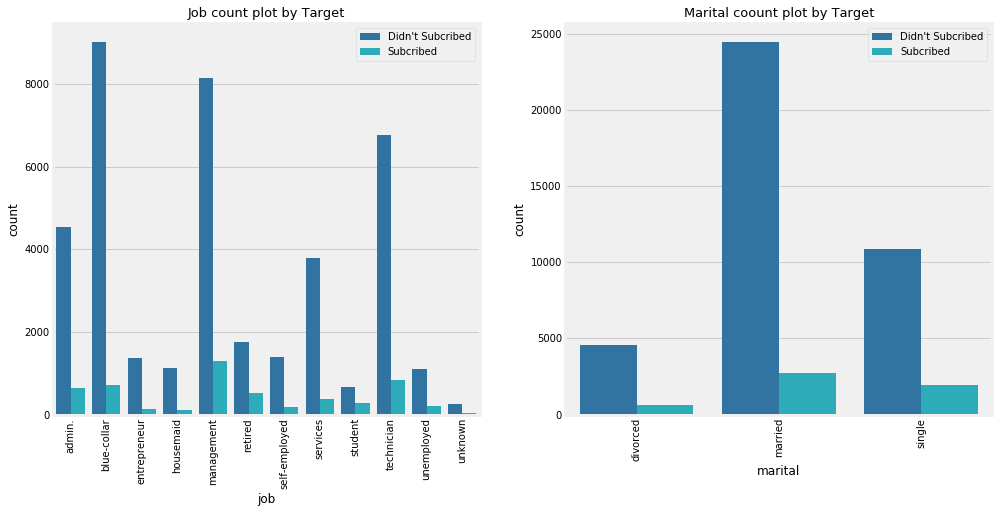

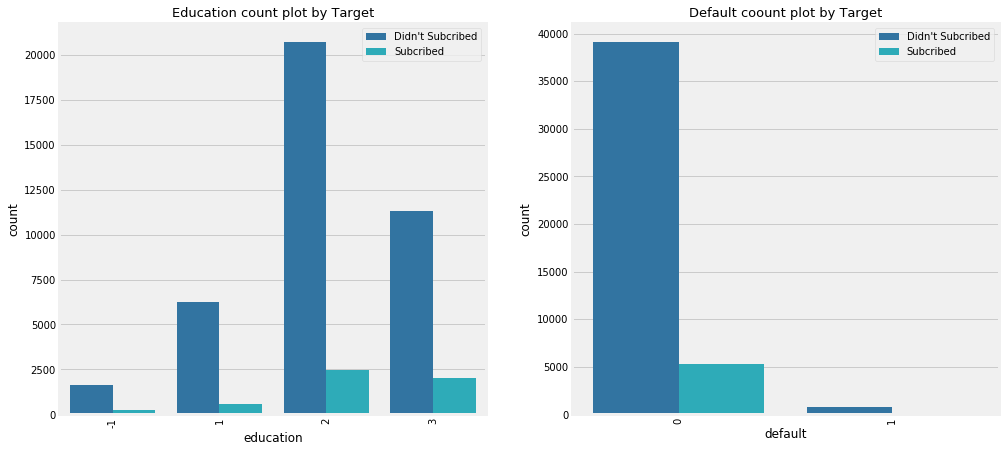

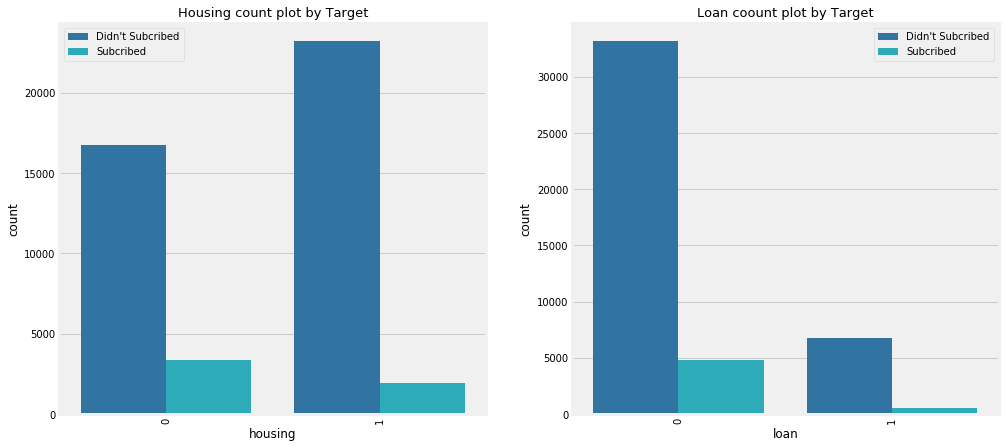

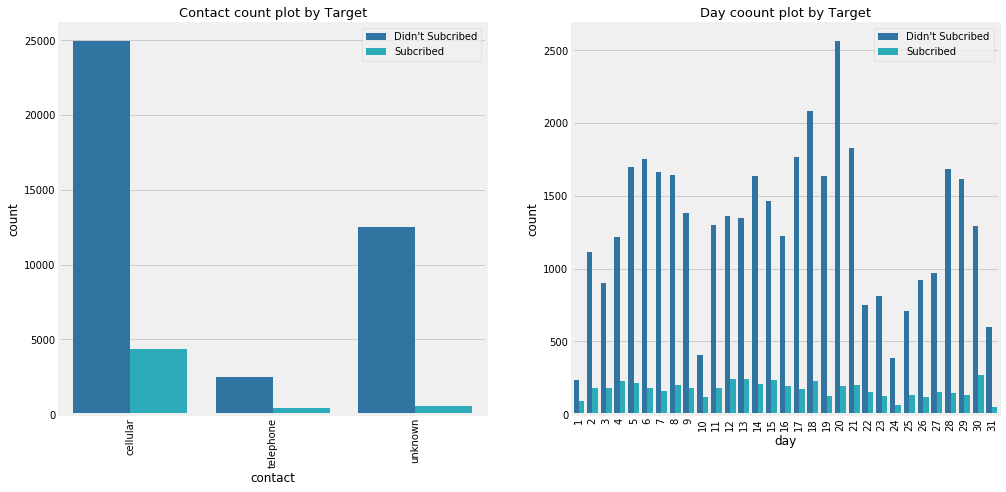

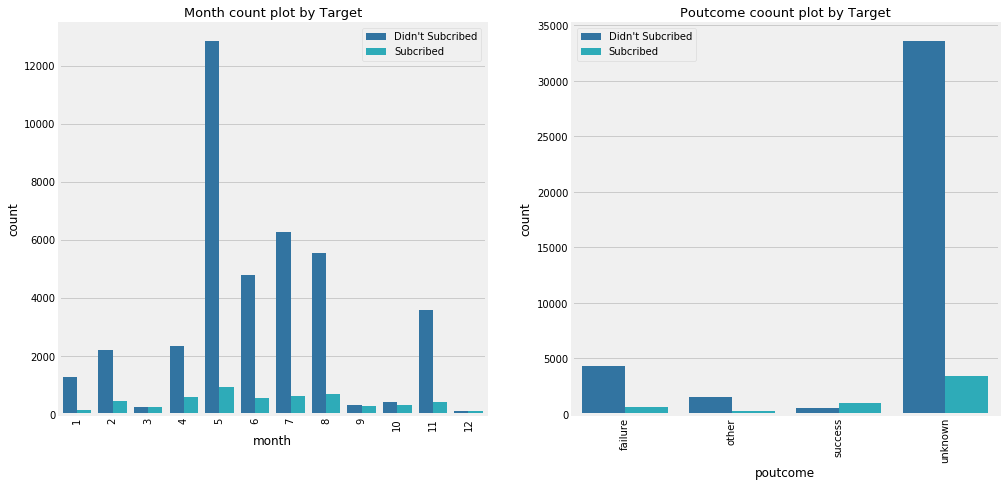

In [10]:
# Subscribe and didn't subscribe for categorical columns
target_count(bank, 'job', 'marital')
target_count(bank, 'education', 'default')
target_count(bank, 'housing', 'loan')
target_count(bank, 'contact', 'day')
target_count(bank, 'month', 'poutcome')

<a id='o5'></a>
#### Observation 5 - Comments from categorical columns
* Management have a subscription rate of ~25 percent followed by technician.
* Married and single clients are more likely to subscribe then divorced clients
* Clients with education of secondary followed by tertiary are more likely to subscribe to term deposits
* Most of the clients don't have credit in default and their subscription rate is higher then people with default
* Cellular communication type have higher subscription rate
* Most of the subscription were made in May and August

<a id='outlier'></a>
### Check outlier and distribution for numerical columns and also plot it's relation with target variable

Age column --------------------------------------------------------------------------------------------------------------


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
29158,83,retired,married,1,0,425,0,0,telephone,2,2,912,1,-1,0,unknown,0
29261,75,retired,divorced,1,0,46,0,0,cellular,2,2,294,1,-1,0,unknown,0
29263,75,retired,married,1,0,3324,0,0,cellular,2,2,149,1,-1,0,unknown,0
29322,83,retired,married,3,0,6236,0,0,cellular,2,2,283,2,-1,0,unknown,0
29865,75,retired,divorced,1,0,3881,1,0,cellular,4,2,136,3,-1,0,unknown,1


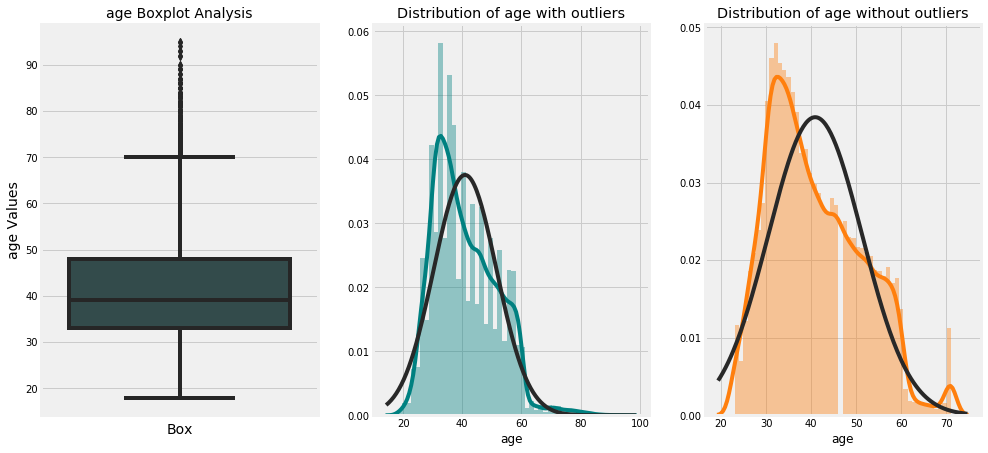

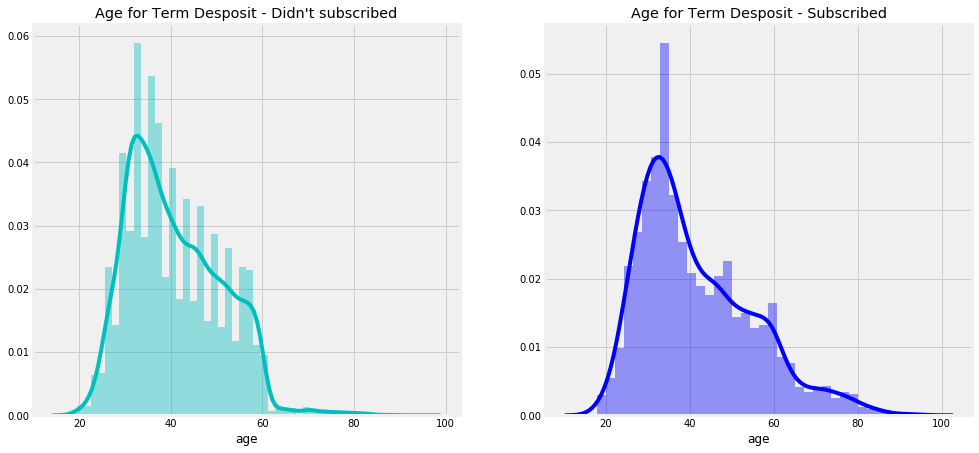

In [11]:
# Outlier, distribution for 'age' column
Q3 = bank['age'].quantile(0.75)
Q1 = bank['age'].quantile(0.25)
IQR = Q3 - Q1

print('Age column', '--'*55)
display(bank.loc[(bank['age'] < (Q1 - 1.5 * IQR)) | (bank['age'] > (Q3 + 1.5 * IQR))].head())

odp_plots(bank, 'age')

# Distribution of 'age' by 'Target'
target_plot(bank, 'age')

Balance column --------------------------------------------------------------------------------------------------------------


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
34,51,management,married,3,0,10635,1,0,unknown,5,5,336,1,-1,0,unknown,0
65,51,management,married,3,0,6530,1,0,unknown,5,5,91,1,-1,0,unknown,0
69,35,blue-collar,single,2,0,12223,1,1,unknown,5,5,177,1,-1,0,unknown,0
70,57,blue-collar,married,2,0,5935,1,1,unknown,5,5,258,1,-1,0,unknown,0
186,40,services,divorced,-1,0,4384,1,0,unknown,5,5,315,1,-1,0,unknown,0


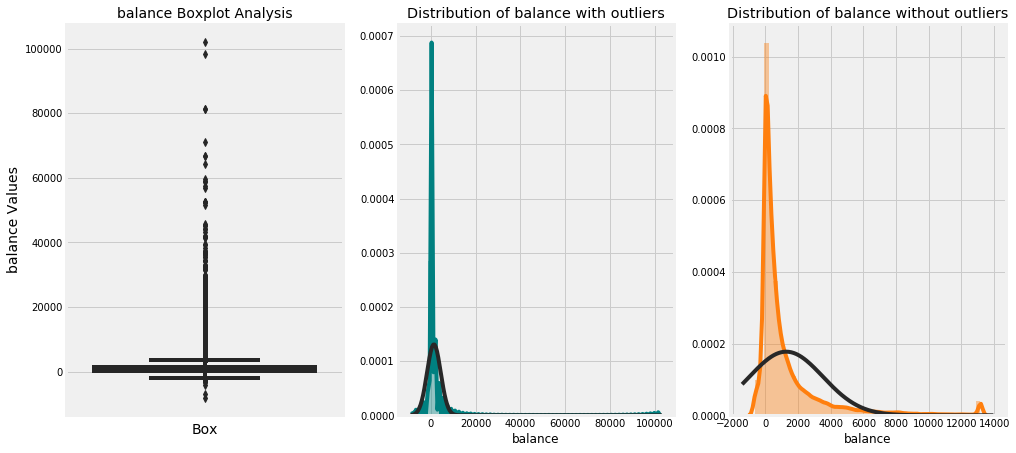

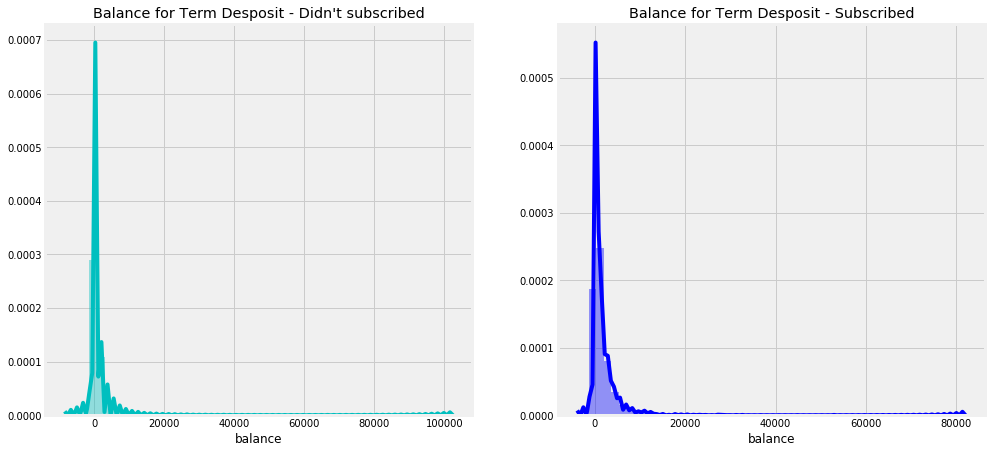

In [12]:
# Outlier, distribution for 'balance' column
Q3 = bank['balance'].quantile(0.75)
Q1 = bank['balance'].quantile(0.25)
IQR = Q3 - Q1
print('Balance column', '--'*55)
display(bank.loc[(bank['balance'] < (Q1 - 1.5 * IQR)) | (bank['balance'] > (Q3 + 1.5 * IQR))].head())

odp_plots(bank, 'balance')

# Distribution of 'balance' by 'Target'
target_plot(bank, 'balance')

Duration column ------------------------------------------------------------------------------------------------------------


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
37,53,technician,married,2,0,-3,0,0,unknown,5,5,1666,1,-1,0,unknown,0
43,54,retired,married,2,0,529,1,0,unknown,5,5,1492,1,-1,0,unknown,0
53,42,admin.,single,2,0,-76,1,0,unknown,5,5,787,1,-1,0,unknown,0
59,46,services,married,1,0,179,1,0,unknown,5,5,1778,1,-1,0,unknown,0
61,53,technician,divorced,2,0,989,1,0,unknown,5,5,812,1,-1,0,unknown,0


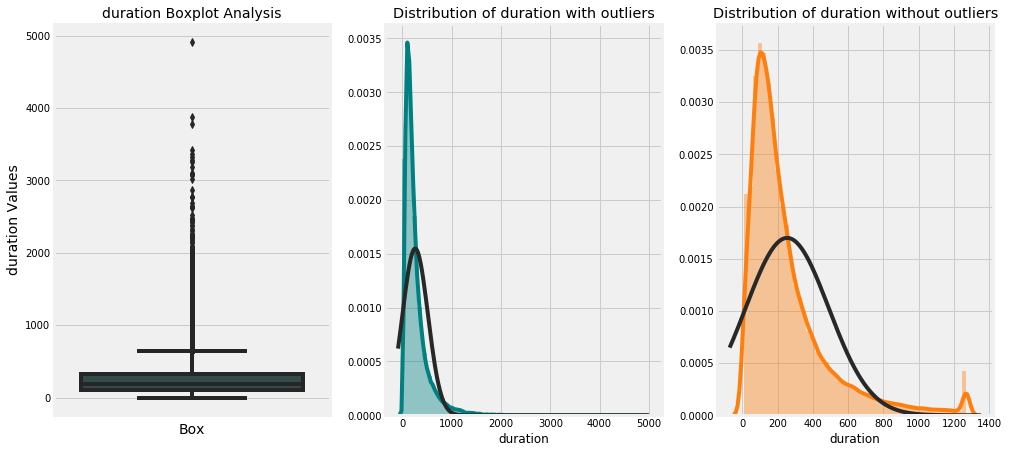

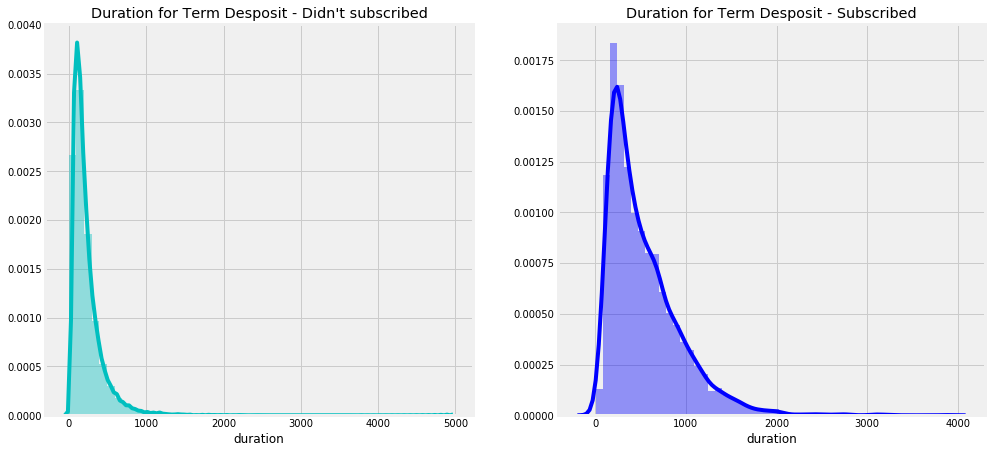

In [13]:
# Outlier, distribution for 'duration' column
Q3 = bank['duration'].quantile(0.75)
Q1 = bank['duration'].quantile(0.25)
IQR = Q3 - Q1

print('Duration column', '--'*54)
display(bank.loc[(bank['duration'] < (Q1 - 1.5 * IQR)) | (bank['duration'] > (Q3 + 1.5 * IQR))].head())

odp_plots(bank, 'duration')

# Distribution of 'duration' by 'Target'
target_plot(bank, 'duration')

Campaign column ------------------------------------------------------------------------------------------------------------


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
758,59,services,married,2,0,307,1,1,unknown,6,5,250,7,-1,0,unknown,0
780,30,admin.,married,2,0,4,0,0,unknown,7,5,172,8,-1,0,unknown,0
906,27,services,single,2,0,0,1,0,unknown,7,5,388,7,-1,0,unknown,0
1103,52,technician,married,-1,0,133,1,0,unknown,7,5,253,8,-1,0,unknown,0
1105,43,admin.,married,3,0,1924,1,0,unknown,7,5,244,7,-1,0,unknown,0


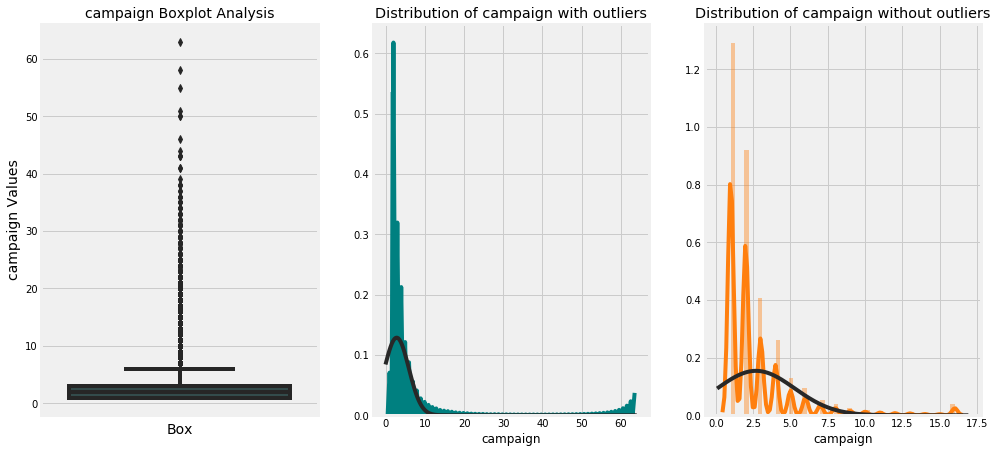

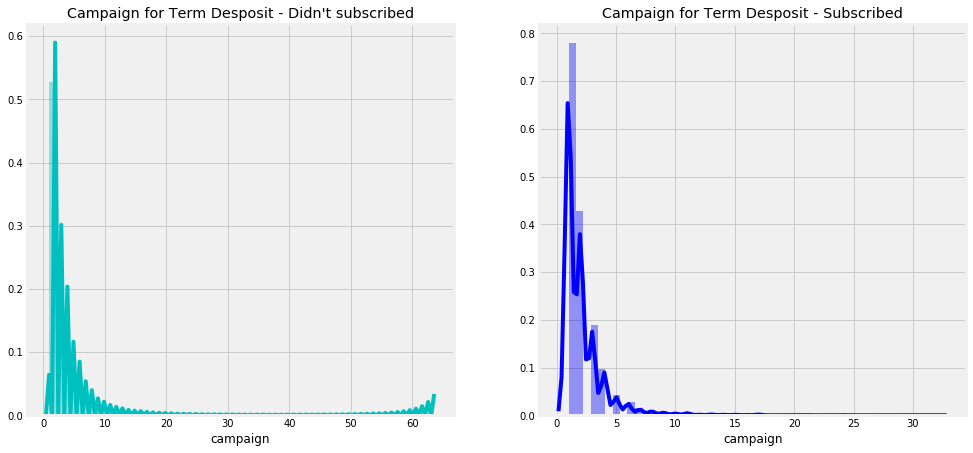

In [14]:
# Outlier, distribution for 'campaign' column
Q3 = bank['campaign'].quantile(0.75)
Q1 = bank['campaign'].quantile(0.25)
IQR = Q3 - Q1

print('Campaign column', '--'*54)
display(bank.loc[(bank['campaign'] < (Q1 - 1.5 * IQR)) | (bank['campaign'] > (Q3 + 1.5 * IQR))].head())

odp_plots(bank, 'campaign')

# Distribution of 'campaign' by 'Target'
target_plot(bank, 'campaign')

Pdays column --------------------------------------------------------------------------------------------------------------


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
24060,33,admin.,married,3,0,882,0,0,telephone,21,10,39,1,151,3,failure,0
24062,42,admin.,single,2,0,-247,1,1,telephone,21,10,519,1,166,1,other,1
24064,33,services,married,2,0,3444,1,0,telephone,21,10,144,1,91,4,failure,1
24072,36,management,married,3,0,2415,1,0,telephone,22,10,73,1,86,4,other,0
24077,36,management,married,3,0,0,1,0,telephone,23,10,140,1,143,3,failure,1


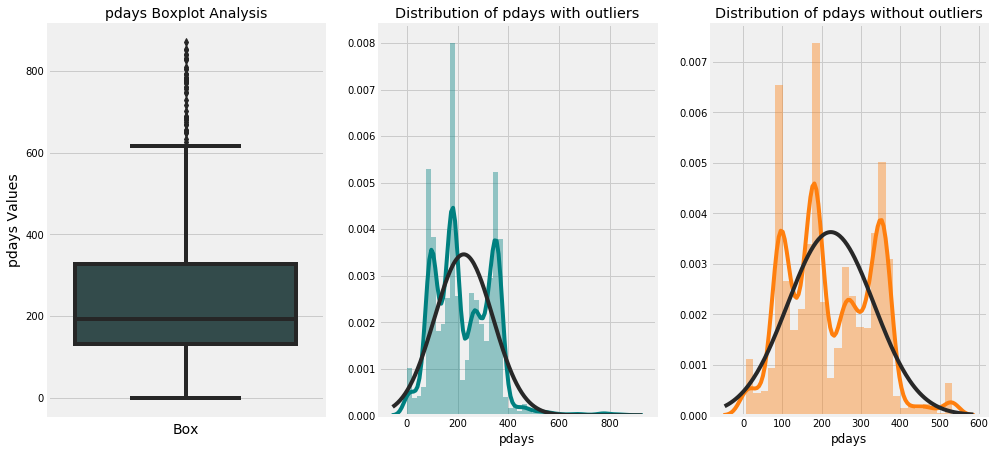

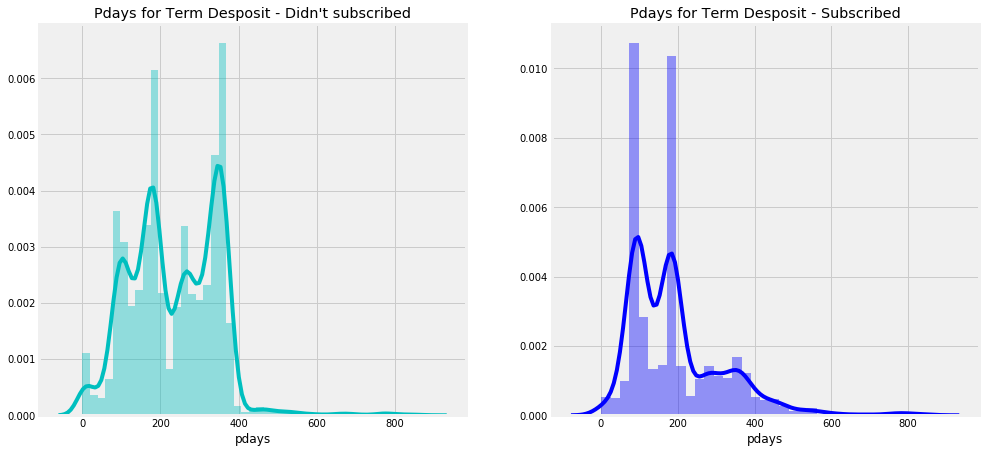

In [15]:
# Outlier, distribution for 'pdays' column
Q3 = bank['pdays'].quantile(0.75)
Q1 = bank['pdays'].quantile(0.25)
IQR = Q3 - Q1

print('Pdays column', '--'*55)
display(bank.loc[(bank['pdays'] < (Q1 - 1.5 * IQR)) | (bank['pdays'] > (Q3 + 1.5 * IQR))].head())

# Check outlier in 'pdays', not considering -1
pdays = bank.loc[bank['pdays'] > 0, ['pdays', 'Target']]
pdays = pd.DataFrame(pdays, columns = ['pdays', 'Target'])
odp_plots(pdays, 'pdays')

# Distribution of 'pdays' by 'Target', not considering -1
target_plot(pdays, 'pdays')

Previous column ------------------------------------------------------------------------------------------------------------


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
24060,33,admin.,married,3,0,882,0,0,telephone,21,10,39,1,151,3,failure,0
24062,42,admin.,single,2,0,-247,1,1,telephone,21,10,519,1,166,1,other,1
24064,33,services,married,2,0,3444,1,0,telephone,21,10,144,1,91,4,failure,1
24072,36,management,married,3,0,2415,1,0,telephone,22,10,73,1,86,4,other,0
24077,36,management,married,3,0,0,1,0,telephone,23,10,140,1,143,3,failure,1


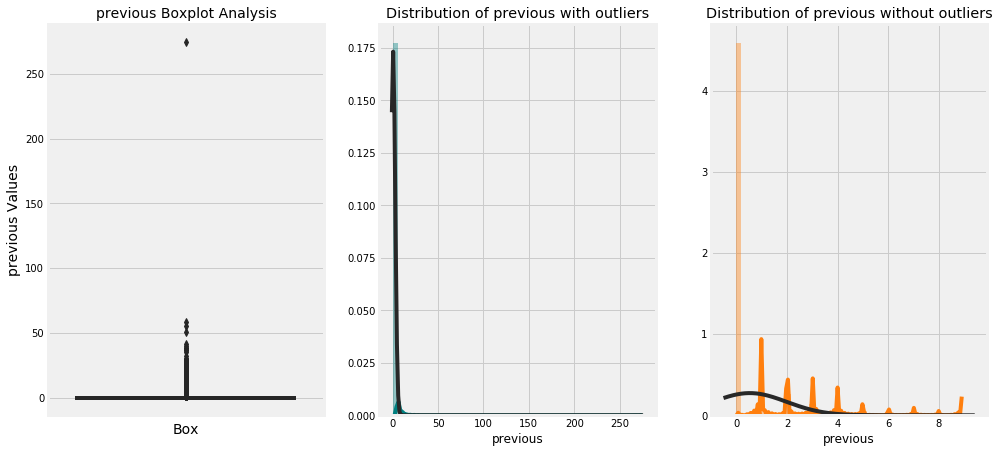

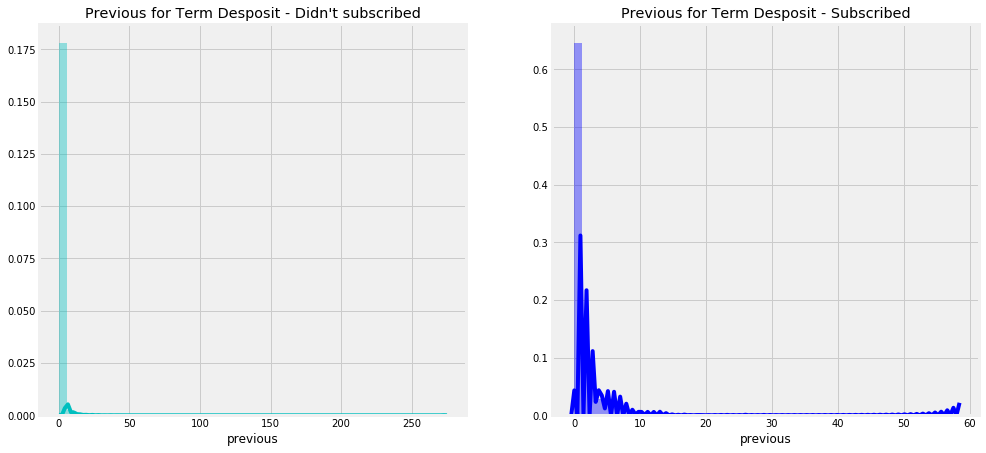

In [16]:
# Outlier, distribution and probability plot for 'previous' column
Q3 = bank['previous'].quantile(0.75)
Q1 = bank['previous'].quantile(0.25)
IQR = Q3 - Q1

print('Previous column', '--'*54)
display(bank.loc[(bank['previous'] < (Q1 - 1.5 * IQR)) | (bank['previous'] > (Q3 + 1.5 * IQR))].head())

odp_plots(bank, 'previous')

# Distribution of 'previous' by 'Target'
target_plot(bank, 'previous')

<a id='o6'></a>
#### Observation 6 - Comments from numerical columns
* Used quantile method to check outliers in numerical column. It appears that there are outliers in each of the numerical columns.
* It appears that removing outliers below 25% percentile and above 75% percentile will bring the age and pdays columns to almost normal distribution.

<a id='dummies'></a>
### Print categorical and numerical columns list, remove outliers with upper and lower percentile values being 99 and 1, respectively and get dummies

In [17]:
print('Categorical Columns: \n{}'.format(list(bank.select_dtypes('category').columns)))
print('\nNumerical Columns: \n{}'.format(list(bank.select_dtypes(exclude = 'category').columns)))

Categorical Columns: 
['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'day', 'month', 'poutcome', 'Target']

Numerical Columns: 
['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']


In [18]:
# Removing outliers with upper and lower percentile values being 99 and 1, respectively
bank_nulls = bank.copy(deep = True)
columns = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

for col in columns:
    upper_lim = np.percentile(bank_nulls[col].values, 99)
    lower_lim = np.percentile(bank_nulls[col].values, 1)
    bank_nulls.loc[(bank_nulls[col] > upper_lim), col] = np.nan
    bank_nulls.loc[(bank_nulls[col] < lower_lim), col] = np.nan

print('Column for which outliers where removed with upper and lower percentile values: \n', columns)

Column for which outliers where removed with upper and lower percentile values: 
 ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']


In [19]:
# # Frequency encoding of 'job' column, this would creating too many columns with sparse distribution
# columns = ['job']#, 'marital', 'contact', 'poutcome']

# for col in columns:
#     counts = bank_nulls[col].value_counts().index.tolist()
#     encoding = bank_nulls.groupby(col).size()
#     encoding = encoding/len(bank_nulls)
#     bank_nulls[col] = bank_nulls[col].map(encoding)
#     print([counts, bank_nulls[col].value_counts().index.tolist()], '\n')

In [20]:
# pd.get_dummies
cols_to_transform = ['job', 'marital', 'contact', 'poutcome']
bank_nulls = pd.get_dummies(bank_nulls, columns = cols_to_transform) #, drop_first = True)

print('Got dummies for \n', cols_to_transform)
bank_nulls.info()

Got dummies for 
 ['job', 'marital', 'contact', 'poutcome']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 35 columns):
age                  44473 non-null float64
education            45211 non-null category
default              45211 non-null category
balance              44308 non-null float64
housing              45211 non-null category
loan                 45211 non-null category
day                  45211 non-null category
month                45211 non-null category
duration             44341 non-null float64
campaign             44760 non-null float64
pdays                44826 non-null float64
previous             44758 non-null float64
Target               45211 non-null category
job_admin.           45211 non-null uint8
job_blue-collar      45211 non-null uint8
job_entrepreneur     45211 non-null uint8
job_housemaid        45211 non-null uint8
job_management       45211 non-null uint8
job_retired          45211 non-null uint8


In [21]:
# Convert 'astype' of categorical columns to integer for getting it ready for MICE
columns = ['education', 'default', 'housing', 'loan', 'day', 'month', 'Target']
for col in columns:
    bank_nulls[col] = bank_nulls[col].astype('float')

<a id='mice'></a>
### Use MICE imputer to handled outliers that were filled with `np.nan` in the earlier step

In [22]:
# start the MICE training
bank_imputed = mice(bank_nulls.values)
bank_imputed = pd.DataFrame(bank_imputed, columns = bank_nulls.columns)

display(bank.describe(include = 'all').T, bank_imputed.describe(include = 'all').T)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,45211,NaN,NaN,NaN,40.9362,10.6188,18,33,39,48,95
job,45211,12,blue-collar,9732,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital,45211,3,married,27214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,45211,4,2,23202,NaN,NaN,NaN,NaN,NaN,NaN,NaN
default,45211,2,0,44396,NaN,NaN,NaN,NaN,NaN,NaN,NaN
balance,45211,NaN,NaN,NaN,1362.27,3044.77,-8019,72,448,1428,102127
housing,45211,2,1,25130,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan,45211,2,0,37967,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contact,45211,3,cellular,29285,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day,45211,31,20,2752,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.836870,10.073690,23.000000,33.0,39.0,48.0,71.743841
education,45211.0,2.019442,0.902795,-1.000000,2.0,2.0,3.0,3.000000
default,45211.0,0.018027,0.133049,0.000000,0.0,0.0,0.0,1.000000
balance,45211.0,1174.932363,1898.534988,-812.502754,81.0,467.0,1402.0,13164.000000
housing,45211.0,0.555838,0.496878,0.000000,0.0,1.0,1.0,1.000000
loan,45211.0,0.160226,0.366820,0.000000,0.0,0.0,0.0,1.000000
day,45211.0,15.806419,8.322476,1.000000,8.0,16.0,21.0,31.000000
month,45211.0,6.144655,2.408034,1.000000,5.0,6.0,8.0,12.000000
duration,45211.0,247.428930,211.290370,11.000000,106.0,183.0,316.0,1269.000000
campaign,45211.0,2.562222,2.214906,1.000000,1.0,2.0,3.0,16.000000


<a id='o7'></a>
#### Observation 7 - Observation after MICE

| **Column** | **Before MICE** | **After MICE** |
|--------|-------------|------------|
|**`age`**| Range of Q1 to Q3 is 33-48. Mean > Median, right (positively) skewed | Range of Q1 to Q3 is unchanged, because of change in min and max values there's a slight reduction is mean, right skewed|
|**`balance`**| Range of Q1 to Q3 is 72-1428. Mean > Median, skewed towards right (positively) | Range of Q1 to Q3 is 81 to 1402, reduction in mean, right skewed |
|**`duration`**| Range of Q1 to Q3 is 103-319. Mean > Median, right (positively) skewed | Range of Q1 to Q3 is 106-316, right skewed|
|**`campaign`**| Range of Q1 to Q3 is 1-3. Mean > Median, right (positively) skewed | Unchanged range and skewness|
|**`pdays`**| 75% of data values are around -1 | Unchanged|
|**`previous`**| 75% of data values are around 0 | Unchanged|

<a id='pdays'></a>
### Checking whether count of 0 in previous column is equal to count of -1 in pdays column

In [23]:
# Checking whether count of 0 in previous is equal to count of -1 in pdays
display(bank_imputed.loc[bank_imputed['previous'] == 0, 'previous'].value_counts().sum(), 
        bank_imputed.loc[bank_imputed['pdays'] == -1, 'pdays'].value_counts().sum())

36954

36954

<a id='o8'></a>
#### Observation 8 - pdays and previous
Count of 0 in previous is equal to count of -1 in pdays column, we might replace -1 in pdays with 0 to account for cases where the client wasn't contacted previously. Checking correlation between variables and target next...

<a id='multi'></a>
## Multivariate visualization
Checking relationship between two or more variables. Includes correlation and scatterplot matrix, checking relation between two variables and Target.

<a id='scatter'></a>
### Check scattermatrix

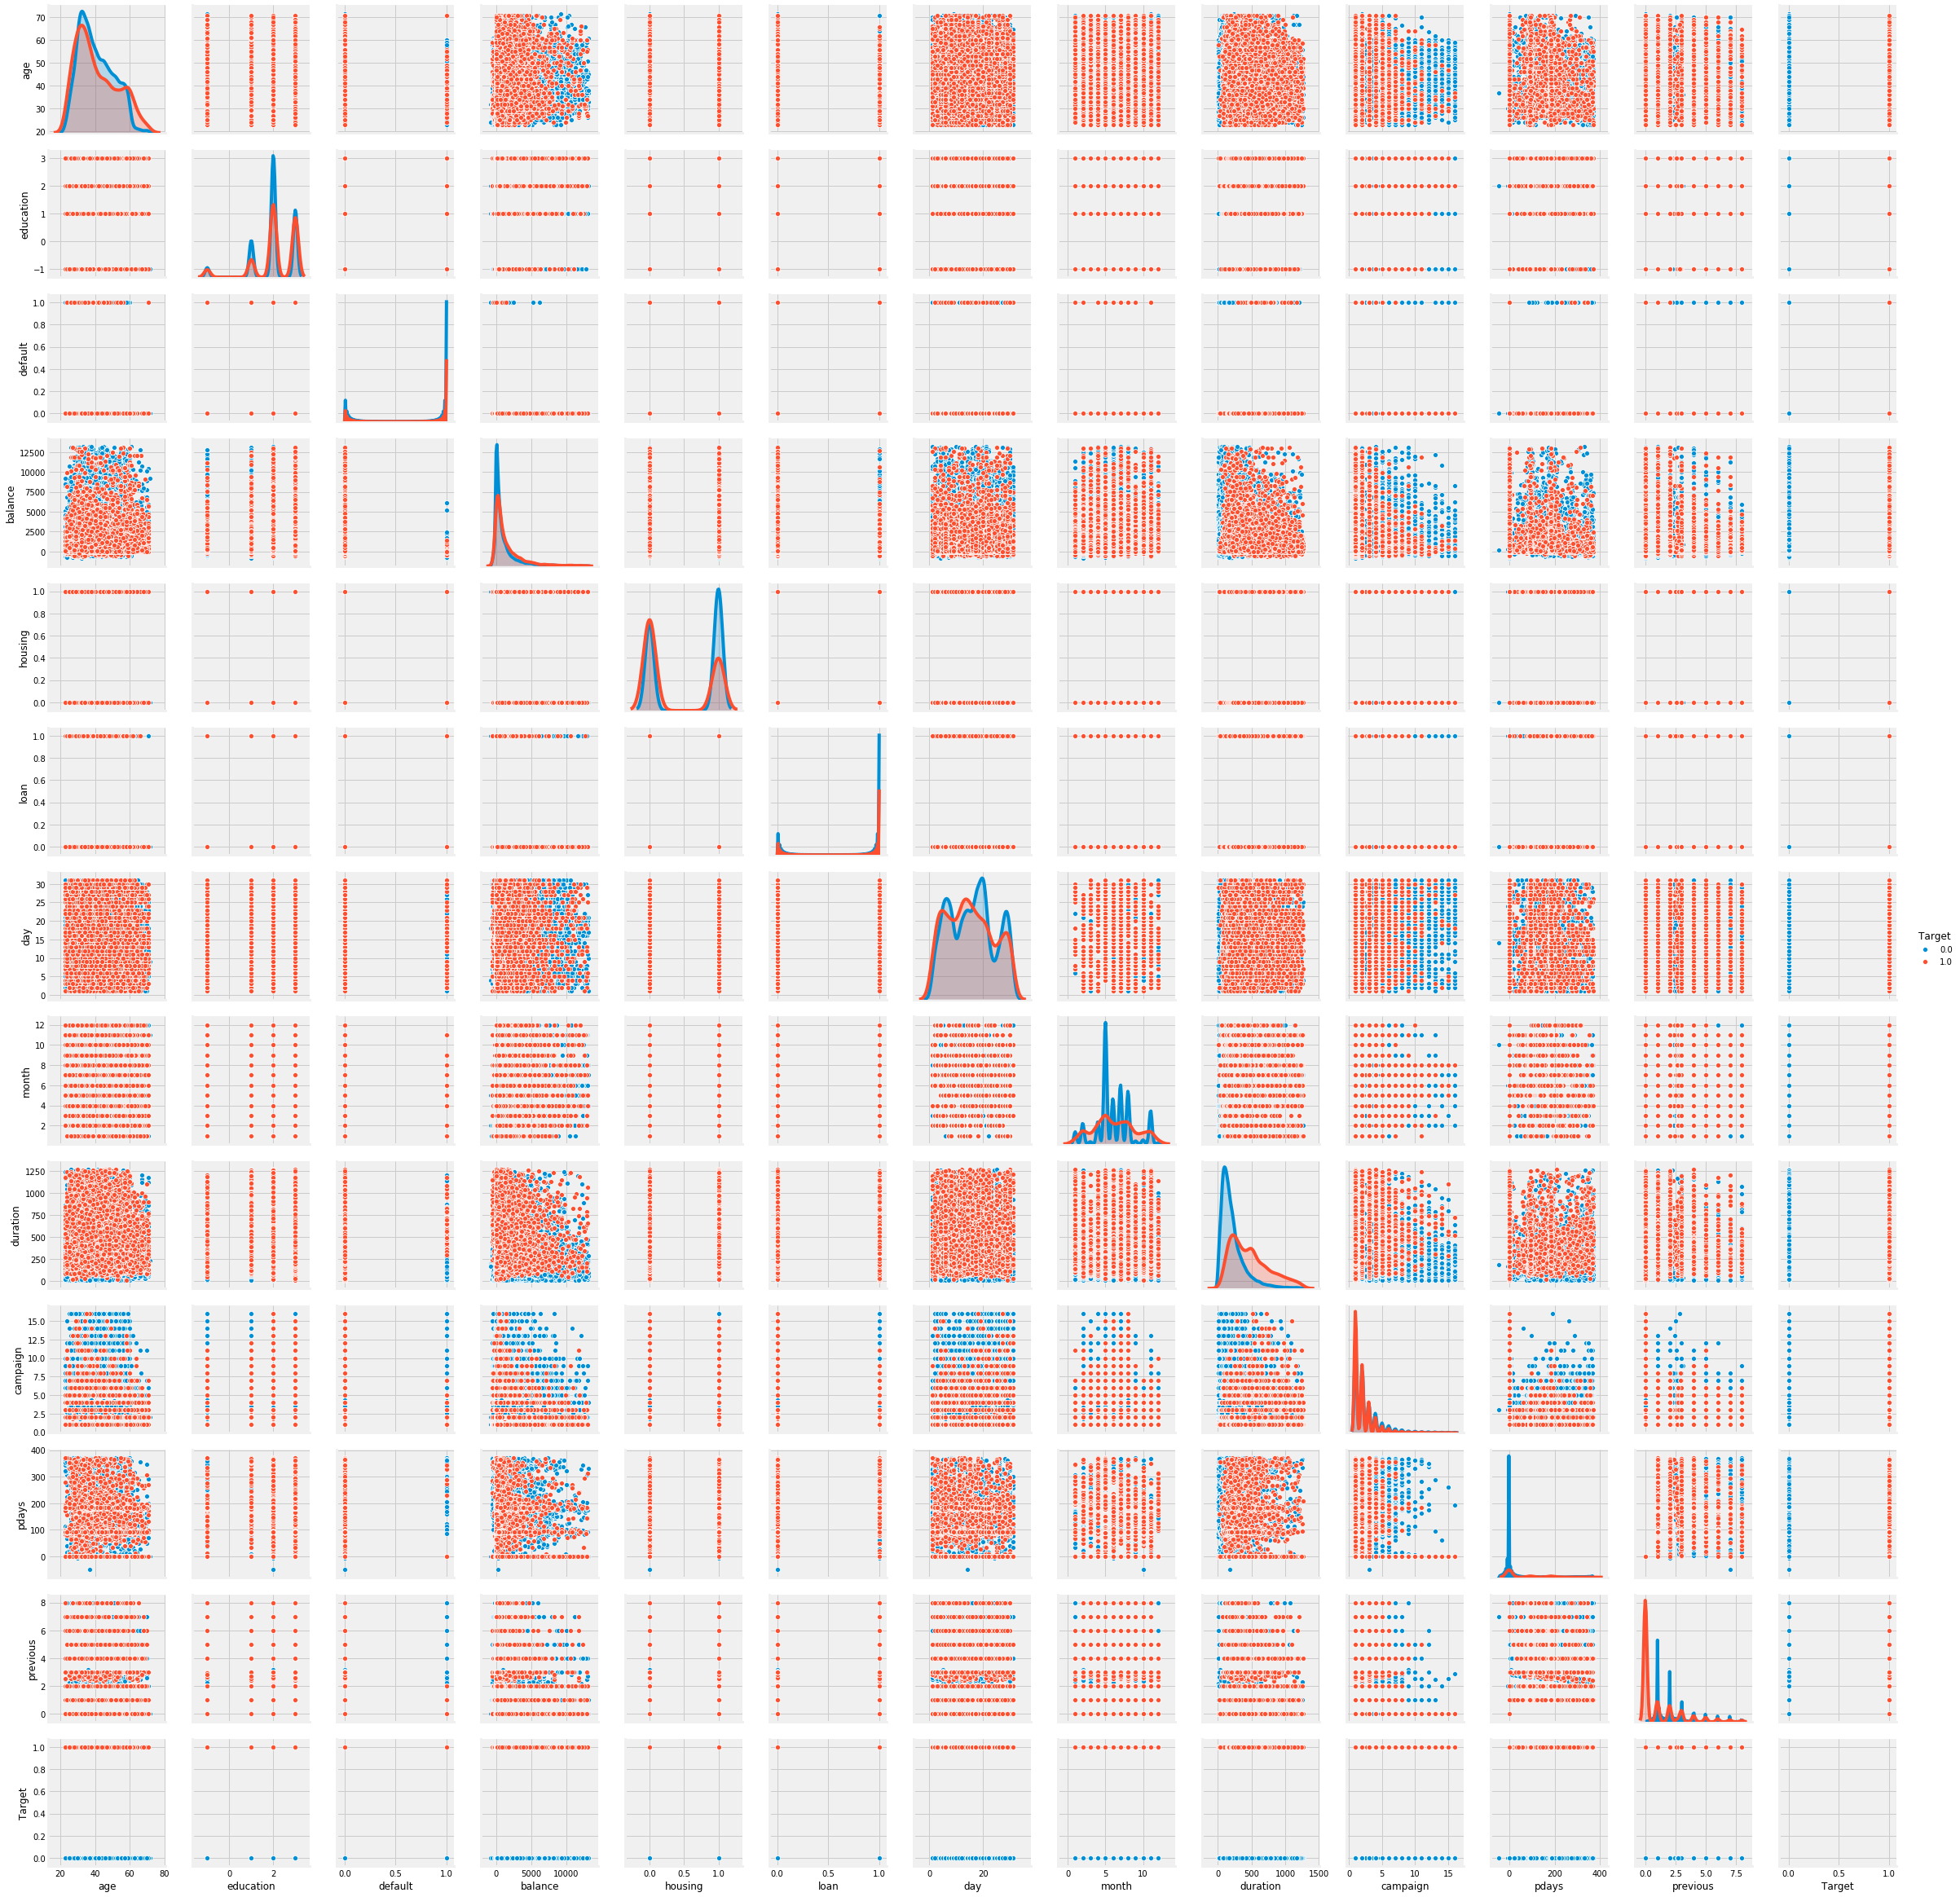

In [24]:
sns.pairplot(bank_imputed[['age', 'education', 'default', 'balance', 'housing', 'loan', 'day', 'month', 
                           'duration', 'campaign', 'pdays', 'previous', 'Target']], hue = 'Target')

<a id='corr'></a>
### Correlation matrix

Text(0.5, 1, 'Correlation Matrix of Data')

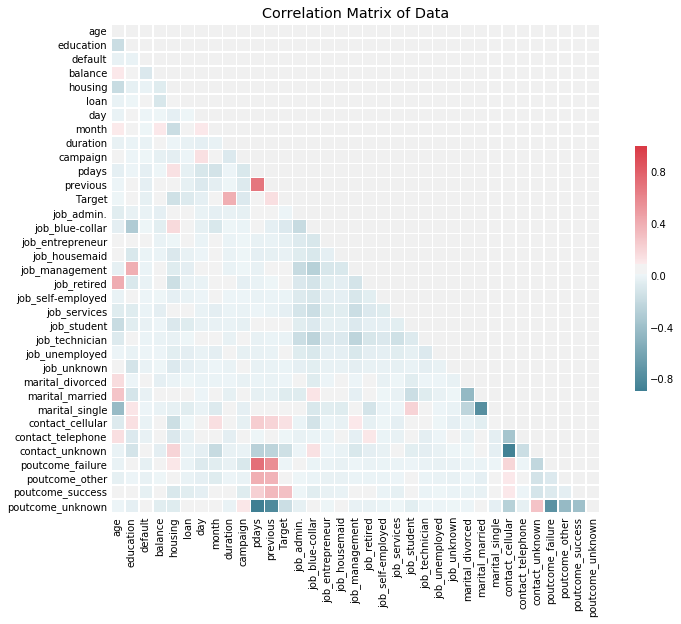

In [25]:
# Correlation matrix for all variables
corr = bank_imputed.corr()

mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize = (11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap = True)

sns.heatmap(corr, mask = mask, cmap = cmap, square = True, linewidths = .5, cbar_kws = {"shrink": .5})#, annot = True)
ax.set_title('Correlation Matrix of Data')

In [26]:
# Filter for correlation value greater than 0.8
sort = corr.abs().unstack()
sort = sort.sort_values(kind = "quicksort", ascending = False)
sort[(sort > 0.8) & (sort < 1)]

pdays             poutcome_unknown    0.891235
poutcome_unknown  pdays               0.891235
contact_unknown   contact_cellular    0.862398
contact_cellular  contact_unknown     0.862398
previous          poutcome_unknown    0.806952
poutcome_unknown  previous            0.806952
dtype: float64

In [27]:
# Absolute correlation of independent variables with 'Target' i.e. the target variable
absCorrwithDep = []
allVars = bank_imputed.drop('Target', axis = 1).columns

for var in allVars:
    absCorrwithDep.append(abs(bank_imputed['Target'].corr(bank_imputed[var])))

display(pd.DataFrame([allVars, absCorrwithDep], index = ['Variable', 'Correlation']).T.\
        sort_values('Correlation', ascending = False))

,Variable,Correlation
8,duration,0.398107
32,poutcome_success,0.306788
33,poutcome_unknown,0.167051
11,previous,0.153341
29,contact_unknown,0.150935
4,housing,0.139173
27,contact_cellular,0.135873
10,pdays,0.0865931
17,job_retired,0.0792453
3,balance,0.0769227


<a id='corr'></a>
#### Observation 9 - Correlation Matrix
* `poutcome_unknown` and `pdays`; `contact_unknown` and `contact_cellular`; `poutcome_unknown` and `previous`; `marital_married` and `marital_single`; `poutcome_unknown` and `poutcome_failure`; `pdays` and `poutcome_failure`; `previous` and `pdays`; `poutcome_failure` and `previous` columns are correlated with each other.
* `duration`, `poutcome_success`, `poutcome_unknown` and `previous` are few columns which have a relatively strong correlation with `Target` column.

In [28]:
#bank_imputed.drop(['pdays', 'contact_cellular'], axis = 1, inplace = True) #, 'previous', 'marital_married', 'poutcome_failure'

<a id='age'></a>
### Creating age groups and check relation with balance and target; also with campaign and target

In [29]:
# Creating age groups
bank_imputed.loc[(bank_imputed['age'] < 30), 'age_group'] = 20
bank_imputed.loc[(bank_imputed['age'] >= 30) & (bank_imputed['age'] < 40), 'age_group'] = 30
bank_imputed.loc[(bank_imputed['age'] >= 40) & (bank_imputed['age'] < 50), 'age_group'] = 40
bank_imputed.loc[(bank_imputed['age'] >= 50) & (bank_imputed['age'] < 60), 'age_group'] = 50
bank_imputed.loc[(bank_imputed['age'] >= 60), 'age_group'] = 60

Text(0.5, 1.0, 'Relationship between balance and age group by Target')

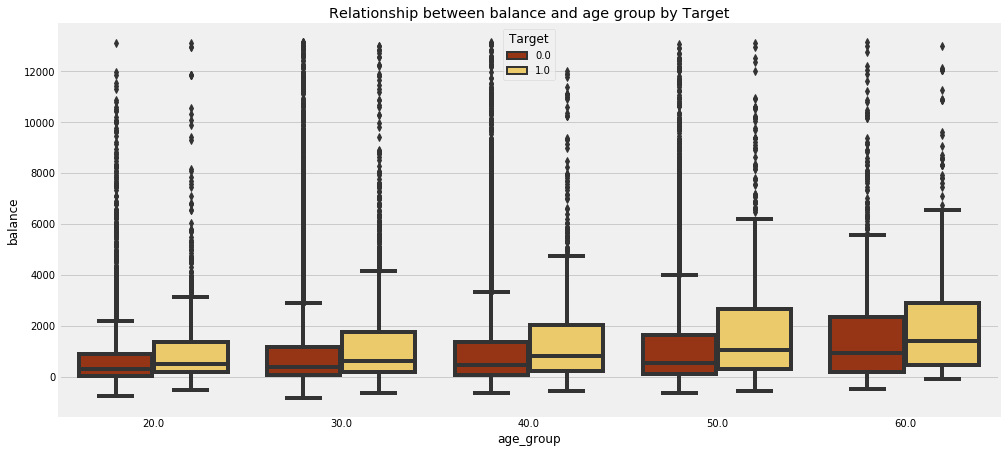

In [30]:
# Check relationship between balance and age group by Target
fig = plt.figure(figsize = (15, 7.2))
ax = sns.boxplot(x = 'age_group', y = 'balance', hue = 'Target', palette = 'afmhot', data = bank_imputed)
ax.set_title('Relationship between balance and age group by Target')

Text(0.5, 1.0, 'Relationship between campaign and age group by Target')

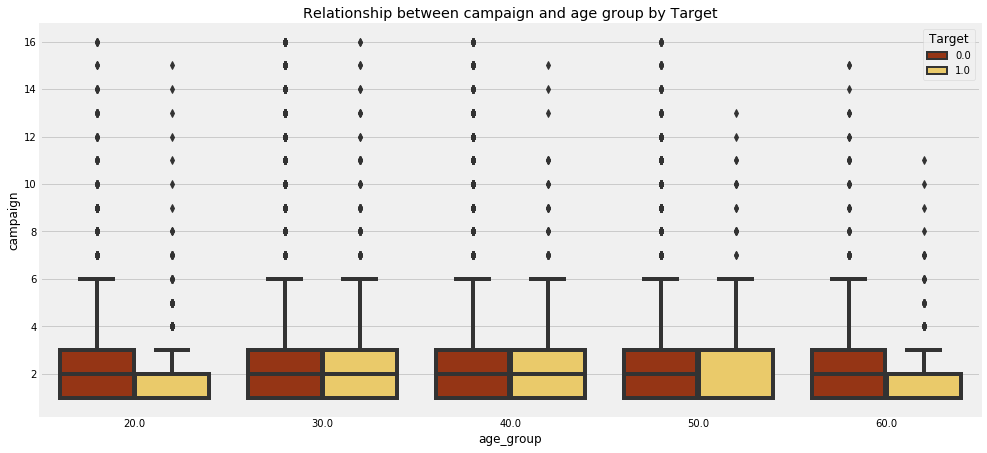

In [31]:
# Check relationship between campaign and age group by Target
fig = plt.figure(figsize = (15, 7.2))
ax = sns.boxplot(x = 'age_group', y = 'campaign', hue = 'Target', palette = 'afmhot', data = bank_imputed)
ax.set_title('Relationship between campaign and age group by Target')

In [32]:
# bank_imputed.drop(['age_group'], axis = 1, inplace = True)

<a id='o10'></a>
#### Observation 10 - Comments
* Created `age_group` and checked it's relation with `balance` and `target` and it appears that higher the balance range more are the chances that the client would subscribe to the term deposit irrespective of age group. It also appears that clients within age group 50 have the highest range of balance.

* Then checked relation between campaign, age group and target and it appears that campaigns for client with age group 20 and 60 are less.

<a id='modelling'></a>
## Modelling
* Create a baseline model
* Use different classification models (Logistic, K-NN and Naïve Bayes) to predict will the client subscribe to term deposit.
* Training and making predictions using an Ensemble Model.

<a id='dummy'></a>
### Dummy Classifier -- Baseline Model

In [33]:
# Separating dependent and independent variables
X = bank_imputed.drop(['Target'], axis = 1)
y = bank_imputed['Target']

# Splitting the data into training and test set in the ratio of 70:30 respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = random_state)

dummy = DummyClassifier(strategy = 'most_frequent', random_state = random_state)
dummy.fit(X_train, y_train)
y_pred = dummy.predict(X_test)

accuracy_ = accuracy_score(y_test, y_pred)
pre_s = precision_score(y_test, y_pred, average = 'binary', pos_label = 1)
re_s = recall_score(y_test, y_pred, average = 'binary', pos_label = 1)
f1_s = f1_score(y_test, y_pred, average = 'binary', pos_label = 1)

pre_m = precision_score(y_test, y_pred, average = 'macro')
re_m = recall_score(y_test, y_pred, average = 'macro')
f1_m = f1_score(y_test, y_pred, average = 'macro')

print('Training Score: ', dummy.score(X_train, y_train).round(3))
print('Test Score: ', dummy.score(X_test, y_test).round(3))

print('Accuracy: ', accuracy_.round(3))
print('Precision Score - Subscribe: ', pre_s.round(3))
print('Recall Score - Subscribe: ', re_s.round(3))
print('f1 Score - Subscribe: ', f1_s.round(3))

print('Precision Score - Macro: ', pre_m.round(3))
print('Recall Score - Macro: ', re_m.round(3))
print('f1 Score - Macro: ', f1_m.round(3))

df = pd.DataFrame([accuracy_.round(3), pre_s.round(3), pre_m.round(3), re_s.round(3), 
                   re_m.round(3), f1_s.round(3), f1_m.round(3)], columns = ['Baseline Model']).T
df.columns = ['Accuracy', 'Precision_Subscribe', 'Precision_Macro',
              'Recall_Subscribe', 'Recall_Macro', 'f1_Subscribe', 'f1_Macro']
df

Training Score:  0.883
Test Score:  0.882
Accuracy:  0.882
Precision Score - Subscribe:  0.0
Recall Score - Subscribe:  0.0
f1 Score - Subscribe:  0.0
Precision Score - Macro:  0.441
Recall Score - Macro:  0.5
f1 Score - Macro:  0.469


,Accuracy,Precision_Subscribe,Precision_Macro,Recall_Subscribe,Recall_Macro,f1_Subscribe,f1_Macro
Baseline Model,0.882,0.0,0.441,0.0,0.5,0.0,0.469


In [34]:
# Helper function for making prediction and evaluating scores
def train_and_predict(n_splits, base_model, X, y, name, subscribe = 1, oversampling = False):
    features = X.columns
    X = np.array(X)
    y = np.array(y)
    
    folds = list(StratifiedKFold(n_splits = n_splits, shuffle = True, random_state = random_state).split(X, y))
    
    train_pred = np.zeros((X.shape[0], len(base_model)))
    
    accuracy = []

    precision_subscribe = []
    recall_subscribe = []
    f1_subscribe = []
    
    precision_macro = []
    recall_macro = []
    f1_macro = []
    
    for i, clf in enumerate(base_model):
        for j, (train, test) in enumerate(folds):
            
            # Creating train and test sets
            X_train = X[train]
            y_train = y[train]
            X_test = X[test]
            y_test = y[test]
            
            if oversampling:
                sm = SMOTE(random_state = random_state, sampling_strategy = 'minority')
                X_train_res, y_train_res = sm.fit_sample(X_train, y_train)
           
            # fit the model
                clf.fit(X_train_res, y_train_res)

            # Get predictions
                y_true, y_pred = y_test, clf.predict(X_test)

            # Evaluate train and test scores
                train_ = clf.score(X_train_res, y_train_res)
                test_ = clf.score(X_test, y_test)
            
            else:
            
            # fit the model
                clf.fit(X_train, y_train)

            # Get predictions
                y_true, y_pred = y_test, clf.predict(X_test)

            # Evaluate train and test scores
                train_ = clf.score(X_train, y_train)
                test_ = clf.score(X_test, y_test)
                      
            # Other scores
            accuracy_ = accuracy_score(y_true, y_pred).round(3)
            
            precision_b = precision_score(y_true, y_pred, average = 'binary', pos_label = subscribe).round(3)
            recall_b = recall_score(y_true, y_pred, average = 'binary', pos_label = subscribe).round(3)
            f1_b = f1_score(y_true, y_pred, average = 'binary', pos_label = subscribe).round(3)
            
            precision_m = precision_score(y_true, y_pred, average = 'macro').round(3)
            recall_m = recall_score(y_true, y_pred, average = 'macro').round(3)
            f1_m = f1_score(y_true, y_pred, average = 'macro').round(3)
            
            print(f'Model- {name.capitalize()} and CV- {j}')
            print('-'*20)
            print('Training Score: {0:.3f}'.format(train_))
            print('Test Score: {0:.3f}'.format(test_))
            
            print('Accuracy Score: {0:.3f}'.format(accuracy_))
            
            print('Precision Score - Subscribe: {0:.3f}'.format(precision_b))
            print('Recall Score - Subscribe: {0:.3f}'.format(recall_b))
            print('f1 Score - Subscribe: {0:.3f}'.format(f1_b))
            
            print('Precision Score - Macro: {0:.3f}'.format(precision_m))
            print('Recall Score - Macro: {0:.3f}'.format(recall_m))
            print('f1 Score - Macro: {0:.3f}'.format(f1_m))
            print('\n')
            
            ## Appending scores   
            accuracy.append(accuracy_)
            precision_subscribe.append(precision_b)
            recall_subscribe.append(recall_b)
            f1_subscribe.append(f1_b)
            precision_macro.append(precision_m)
            recall_macro.append(recall_m)
            f1_macro.append(f1_m)
                       
            # Creating a dataframe of scores
            df = pd.DataFrame([np.mean(accuracy).round(3), np.mean(precision_subscribe).round(3), 
                               np.mean(precision_macro).round(3), np.mean(recall_subscribe).round(3), 
                               np.mean(recall_macro).round(3), np.mean(f1_subscribe).round(3), 
                               np.mean(f1_macro).round(3)], columns = [name]).T
            df.columns = ['Accuracy', 'Precision_Subscribe', 'Precision_Macro',
                          'Recall_Subscribe', 'Recall_Macro', 'f1_Subscribe', 'f1_Macro']
            
    return df

In [35]:
# Separating dependent and independent variables
from sklearn.preprocessing import RobustScaler
X = bank_imputed.drop(['Target'], axis = 1)
y = bank_imputed['Target']

# Applying RobustScaler to make it less prone to outliers
features = X.columns
scaler = RobustScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns = features)

# Scaling the independent variables
Xs = X.apply(zscore)

display(X.shape, Xs.shape, y.shape)

(45211, 35)

(45211, 35)

(45211,)

<a id='sm'></a>
### Logistic Regression, kNN and Naive Bayes
Oversampling the one with better accuracy and recall score for subscribe

<a id='lr'></a>
#### Logistic Regression

In [36]:
# LR model without hyperparameter tuning
LR = LogisticRegression()
base_model = [LR]
n_splits = 5
df1 = train_and_predict(n_splits, base_model, X, y, 'Logistic Regression Without Hyperparameter Tuning')
df = df.append(df1)
df

Model- Logistic regression without hyperparameter tuning and CV- 0
--------------------
Training Score: 0.898
Test Score: 0.901
Accuracy Score: 0.901
Precision Score - Subscribe: 0.648
Recall Score - Subscribe: 0.337
f1 Score - Subscribe: 0.444
Precision Score - Macro: 0.783
Recall Score - Macro: 0.657
f1 Score - Macro: 0.695


Model- Logistic regression without hyperparameter tuning and CV- 1
--------------------
Training Score: 0.899
Test Score: 0.896
Accuracy Score: 0.896
Precision Score - Subscribe: 0.601
Recall Score - Subscribe: 0.333
f1 Score - Subscribe: 0.428
Precision Score - Macro: 0.759
Recall Score - Macro: 0.652
f1 Score - Macro: 0.686


Model- Logistic regression without hyperparameter tuning and CV- 2
--------------------
Training Score: 0.899
Test Score: 0.897
Accuracy Score: 0.897
Precision Score - Subscribe: 0.614
Recall Score - Subscribe: 0.328
f1 Score - Subscribe: 0.428
Precision Score - Macro: 0.765
Recall Score - Macro: 0.650
f1 Score - Macro: 0.686


Model- Log

,Accuracy,Precision_Subscribe,Precision_Macro,Recall_Subscribe,Recall_Macro,f1_Subscribe,f1_Macro
Baseline Model,0.882,0.000,0.441,0.000,0.500,0.000,0.469
Logistic Regression Without Hyperparameter Tuning,0.898,0.627,0.772,0.323,0.649,0.426,0.685


In [37]:
# LR with hyperparameter tuning
LR = LogisticRegression(n_jobs = -1, random_state = random_state)

params = {'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'max_iter': [100, 110, 120, 130, 140]}
scoring = {'Recall': make_scorer(recall_score), 'f1_score': make_scorer(f1_score)}

skf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = random_state)
LR_hyper = GridSearchCV(LR, param_grid = params, n_jobs = -1, cv = skf, scoring = scoring, refit = 'f1_score')

LR_hyper.fit(X_train, y_train)
print(LR_hyper.best_estimator_)
print(LR_hyper.best_params_)

LogisticRegression(C=1, max_iter=140, n_jobs=-1, random_state=42)
{'C': 1, 'max_iter': 140, 'penalty': 'l2'}


In [38]:
# LR model with hyperparameter tuning
LR_Hyper = LogisticRegression(C = 100, class_weight = None, dual = False, fit_intercept = True, 
                              intercept_scaling = 1, l1_ratio = None, max_iter = 100,
                              multi_class = 'warn', n_jobs = -1, penalty = 'l2', random_state = 42,
                              solver = 'warn', tol = 0.0001, verbose = 0, warm_start = False)
base_model = [LR_Hyper]
n_splits = 5
df1 = train_and_predict(n_splits, base_model, X, y, 'Logistic Regression With Hyperparameter Tuning')
df = df.append(df1)
df

ValueError: Logistic Regression supports only solvers in ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], got warn.

<a id='knn'></a>
#### k-Nearest Neighbor Classifier

In [ ]:
# KNN Model after scaling the features without hyperparameter tuning
kNN = KNeighborsClassifier()
base_model = [kNN]
n_splits = 5
df1 = train_and_predict(n_splits, base_model, Xs, y, 'k-Nearest Neighbor Scaled Without Hyperparameter Tuning')
df = df.append(df1)
df

In [ ]:
# Choosing a K Value
error_rate = {}
weights = ['uniform', 'distance']
for w in weights:
    print(w)
    rate = []
    for i in range(1, 40):
        knn = KNeighborsClassifier(n_neighbors = i, weights = w)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        rate.append(np.mean(y_pred != y_test))
    plt.figure(figsize = (15, 7.2))
    plt.plot(range(1, 40), rate, color = 'blue', linestyle = 'dashed', marker = 'o', 
             markerfacecolor = 'red', markersize = 10)
    plt.title('Error Rate vs K Value')
    plt.xlabel('K')
    plt.ylabel('Error Rate')
    plt.show()

In [ ]:
# KNN with hyperparameter tuning
kNN = KNeighborsClassifier(n_jobs = -1)

params = {'n_neighbors': list(range(3, 40, 2)), 'weights': ['uniform', 'distance']}

scoring = {'Recall': make_scorer(recall_score), 'f1_score': make_scorer(f1_score)}

skf = StratifiedKFold(n_splits = 3, shuffle = True, random_state = random_state)

kNN_hyper = GridSearchCV(kNN, param_grid = params, n_jobs = -1, cv = skf, scoring = scoring, refit = 'f1_score')

kNN_hyper.fit(X_train, y_train)
print(kNN_hyper.best_estimator_)
print(kNN_hyper.best_params_)

In [ ]:
# KNN with hyperparameter tuning
kNN_hyper = KNeighborsClassifier(algorithm = 'auto', leaf_size = 30, metric = 'minkowski', metric_params = None, 
                                 n_jobs = -1, n_neighbors = 3, p = 2, weights = 'distance')
base_model = [kNN_hyper]
n_splits = 5
df1 = train_and_predict(n_splits, base_model, Xs, y, 'k-Nearest Neighbor Scaled With Hyperparameter Tuning')
df = df.append(df1)
df

<a id='nb'></a>
#### Naive Bayes Classifier

In [ ]:
# Naive Bayes Model
NB = GaussianNB()
base_model = [NB]
n_splits = 5
df1 = train_and_predict(n_splits, base_model, X, y, 'Naive Bayes Classifier')
df = df.append(df1)
df

<a id='onb'></a>
#### Oversampling and Naive Bayes

In [ ]:
# Naive Bayes with oversampling
NB_over = GaussianNB()
base_model = [NB_over]
n_splits = 5
df1 = train_and_predict(n_splits, base_model, X, y, 'Naive Bayes, Oversampled', 
                       oversampling = True)
df = df.append(df1)
df

<a id='olr'></a>
#### Oversampling and Logistic Regression

In [ ]:
# LR model with oversampling
LR_over = LogisticRegression(C = 1, class_weight = None, dual = False, fit_intercept = True, 
                              intercept_scaling = 1, l1_ratio = None, max_iter = 100,
                              multi_class = 'warn', n_jobs = -1, penalty = 'l1', random_state = 42,
                              solver = 'warn', tol = 0.0001, verbose = 0, warm_start = False)
base_model = [LR_over]
n_splits = 5
df1 = train_and_predict(n_splits, base_model, X, y, 'Logistic Regression, Oversampled With Hyperparameter Tuning', 
                       oversampling = True)
df = df.append(df1)
df

<a id='et'></a>
### Ensemble Techniques
Decision Tree Classifier, Bagging Classifier, AdaBoost Classifier, Gradient Boosting Classifier and Random Forest Classifier. Oversampling the ones with higher accuracy and better recall for subscribe.

<a id='dt'></a>
#### Decision Tree Classifier

In [ ]:
# Decision Tree Classifier
DT = DecisionTreeClassifier(random_state = random_state)
base_model = [DT]
n_splits = 5
df1 = train_and_predict(n_splits, base_model, X, y, 'Decision Tree Classifier')
df = df.append(df1)
df

In [ ]:
# Decision Tree Classifier with hyperparameter tuning
dt_hyper = DecisionTreeClassifier(max_depth = 3, random_state = random_state)
base_model = [dt_hyper]
n_splits = 5
df1 = train_and_predict(n_splits, base_model, X, y, 'Decision Tree Classifier - Reducing Max Depth')
df = df.append(df1)
df

In [ ]:
dt_hyper = DecisionTreeClassifier(max_depth = 3, random_state = random_state)
dt_hyper.fit(X, y)
decisiontree = open('decisiontree.dot','w')
dot_data = export_graphviz(dt_hyper, out_file = 'decisiontree.dot', feature_names = X.columns,
    class_names = ['No', 'Yes'], rounded = True, proportion = False, filled = True)
decisiontree.close()

retCode = system('dot -Tpng decisiontree.dot -o decisiontree.png')
if(retCode>0):
    print('system command returning error: '+str(retCode))
else:
    display(Image('decisiontree.png'))

In [ ]:
print('Feature Importance for Decision Tree Classifier ', '--'*38)
feature_importances = pd.DataFrame(dt_hyper.feature_importances_, index = X.columns, 
                                   columns=['Importance']).sort_values('Importance', ascending = True)
feature_importances.sort_values(by = 'Importance', ascending = True).plot(kind = 'barh', figsize = (15, 7.2))

<a id='bag'></a>
#### Bagging, AdaBoost, Gradient Boosting Classifier

In [ ]:
# Bagging Classifier
bgcl = BaggingClassifier(base_estimator = DecisionTreeClassifier(max_depth = 3, random_state = random_state), 
                         n_estimators = 50, random_state = random_state)
base_model = [bgcl]
n_splits = 5
df1 = train_and_predict(n_splits, base_model, X, y, 'Bagging Classifier')
df = df.append(df1)
df

In [ ]:
# AdaBoost Classifier
abcl = AdaBoostClassifier(n_estimators = 10, random_state = random_state)
base_model = [abcl]
n_splits = 5
df1 = train_and_predict(n_splits, base_model, X, y, 'AdaBoost Classifier')
df = df.append(df1)
df

In [ ]:
# Gradient Boosting Classifier
gbcl = GradientBoostingClassifier(n_estimators = 50, random_state = random_state)
base_model = [gbcl]
n_splits = 5
df1 = train_and_predict(n_splits, base_model, X, y, 'Gradient Boosting Classifier')
df = df.append(df1)
df

<a id='oa'></a>
#### Oversampling and AdaBoost Classifier

In [ ]:
abcl_over = AdaBoostClassifier(n_estimators = 15, random_state = random_state, learning_rate = 0.3)
base_model = [abcl_over]
n_splits = 5
df1 = train_and_predict(n_splits, base_model, X, y, 'AdaBoost Classifier, Oversampled', oversampling = True)
df = df.append(df1)
df

<a id='rf'></a>
#### Random Forest Classifier

In [ ]:
# Random Forest Classifier
rfc = RandomForestClassifier(n_jobs = -1, random_state = random_state)
base_model = [rfc]
n_splits = 5
df1 = train_and_predict(n_splits, base_model, X, y, 'Random Forest Classifier')
df = df.append(df1)
df

In [ ]:
# Random Forest Classifier with hyperparameter tuning
rfc = RandomForestClassifier(n_jobs = -1, random_state = random_state)
params = {'n_estimators' : [10, 20, 30, 50, 75, 100], 'max_depth': [1, 2, 3, 5, 7, 10]}

scoring = {'Recall': make_scorer(recall_score), 'f1_score': make_scorer(f1_score)}

skf = StratifiedKFold(n_splits = 3, shuffle = True, random_state = random_state)

rfc_grid = GridSearchCV(rfc, param_grid = params, n_jobs = -1, cv = skf, scoring = scoring, refit = 'f1_score')
rfc_grid.fit(X, y)

print(rfc_grid.best_estimator_)
print(rfc_grid.best_params_)

In [ ]:
# Random Forest Classifier with hyperparameter tuning
rfc_hyper = RandomForestClassifier(bootstrap = True, class_weight = None, criterion = 'gini', max_depth = 10, 
                                   max_features = 'auto', max_leaf_nodes = None, min_impurity_decrease = 0.0,
                                   min_impurity_split = None, min_samples_leaf = 1, min_samples_split = 2,
                                   min_weight_fraction_leaf = 0.0, n_estimators = 20, n_jobs = -1, 
                                   oob_score = False, random_state = 42, verbose = 0, warm_start = False)
base_model = [rfc_hyper]
n_splits = 5
df1 = train_and_predict(n_splits, base_model, X, y, 'Random Forest Classifier With Hyperparameter Tuning')
df = df.append(df1)
df

<a id='orf'></a>
#### Oversampling and Random Forest Classifier

In [ ]:
# Random Forest Classifier with hyperparameter tuning, Oversampled
rfc_over = RandomForestClassifier(bootstrap = True, class_weight = None, criterion = 'gini', max_depth = 10, 
                                   max_features = 'auto', max_leaf_nodes = None, min_impurity_decrease = 0.0,
                                   min_impurity_split = None, min_samples_leaf = 1, min_samples_split = 2,
                                   min_weight_fraction_leaf = 0.0, n_estimators = 20, n_jobs = -1, 
                                   oob_score = False, random_state = 42, verbose = 0, warm_start = False)
base_model = [rfc_over]
n_splits = 5
df1 = train_and_predict(n_splits, base_model, X, y, 
                        'Random Forest Classifier, Oversampled With Hyperparameter Tuning',
                        oversampling = True)
df = df.append(df1)
df

In [ ]:
# Random Forest Classifier with hyperparameter tuning, Oversampled -- Reducing Max Depth
rfc_over = RandomForestClassifier(bootstrap = True, class_weight = None, criterion = 'gini', max_depth = 3, 
                                   max_features = 'auto', max_leaf_nodes = None, min_impurity_decrease = 0.0,
                                   min_impurity_split = None, min_samples_leaf = 1, min_samples_split = 2,
                                   min_weight_fraction_leaf = 0.0, n_estimators = 50, n_jobs = -1, 
                                   oob_score = False, random_state = 42, verbose = 0, warm_start = False)
base_model = [rfc_over]
n_splits = 5
df1 = train_and_predict(n_splits, base_model, X, y, 
                        'Random Forest Classifier, Oversampled With Hyperparameter Tuning - Reducing Max Depth',
                        oversampling = True)
df = df.append(df1)
df

In [ ]:
rfc_over = RandomForestClassifier(bootstrap = True, class_weight = None, criterion = 'gini', max_depth = 3, 
                                   max_features = 'auto', max_leaf_nodes = None, min_impurity_decrease = 0.0,
                                   min_impurity_split = None, min_samples_leaf = 1, min_samples_split = 2,
                                   min_weight_fraction_leaf = 0.0, n_estimators = 50, n_jobs = -1, 
                                   oob_score = False, random_state = 42, verbose = 0, warm_start = False)
rfc_over.fit(X, y)

random_forest_tree = open('random_forest.dot','w')
dot_data = export_graphviz(rfc_over.estimators_[0], out_file = random_forest_tree, feature_names = list(X_train), class_names = ['No', 'Yes'], rounded = True, proportion = False, filled = True)
random_forest_tree.close()

retCode = system("dot -Tpng random_forest.dot -o random_forest.png")
if(retCode>0):
    print("system command returning error: "+str(retCode))
else:
    display(Image("random_forest.png"))

In [ ]:
print('Feature Importance for Random Forest Classifier ', '--'*38)
feature_importances = pd.DataFrame(rfc_over.feature_importances_, index = X.columns, 
                                   columns=['Importance']).sort_values('Importance', ascending = True)
feature_importances.sort_values(by = 'Importance', ascending = True).plot(kind = 'barh', figsize = (15, 7.2))

<a id='mr'></a>
### Comparing model results

In [ ]:
print('Conditional Formatting on the scores dataframe ', '--'*39)
display(df.style.background_gradient(cmap = sns.light_palette('green', as_cmap = True)))

In [ ]:
for i, types in enumerate(df.columns):
    temp = df[types]
    plt.figure(i, figsize = (15, 7.2))
    temp.sort_values(ascending = True).plot(kind = 'barh')
    plt.title(f'{types.capitalize()} Scores')
    plt.show()

<a id='conclusion'></a>
### Conclusion

The classification goal is to predict if the client will subscribe (yes/no) a term deposit. 

Most of the ML models works best when the number of classes are in equal proportion since they are designed to maximize accuracy and reduce error. Thus, they do not take into account the class distribution / proportion or balance of classes. In our dataset, the clients subscribing to term deposit (class 'yes' i.e. 1) is 11.7% whereas those about 88.3% of the clients didn't subscribe (class 'no' i.e. 0) to the term deposit.

Building a <span class="girk">DummyClassifier</span>, baseline model, in our case gave an accuracy of 88.2% with zero recall and precision for predicting minority class i.e. where the client subscribed to term deposits. In this cases, important performance measures such as precision, recall, and f1-score would be helpful. We can also calculate this metrics for the minority, positive, class.

* **Precision**: When it predicts the positive result, how often is it correct? i.e. limit the number of false positives.
* **Recall**: When it is actually the positive result, how often does it predict correctly? i.e. limit the number of false negatives.
* **f1-score**: Harmonic mean of precision and recall.

The confusion matrix for class 1 (Subscribed) would look like:

|                        | Predicted: 0 (Not Subscribed) | Predicted: 1 (Subscribed)|
|------------------------|-----------------------------|------------------------|
|**Actual: 0 (Not Subscribed)**| True Negatives              | False Positives        |
|**Actual: 1 (Subscribed)**    | False Negatives             | True Positives         |

* **Precision would tell us cases where actually the client hadn't subscribed to the term deposit but we predicted it as subscribed.**
* **Recall would tell us cases where actually the client had subscribed  to the term deposit but we predicted it as didn't subscribe.**

In our case, it would be recall that would hold more importance then precision. So <span class="mark">choosing recall particularly for class 1 and accuracy as as evaluation metric. Also important would be how is model behaving over the training and test scores across the cross validation sets.</span>

**Modeling** was sub-divided in two phases, in the first phase we applied standard models (with and without the hyperparameter tuning wherever applicable) such as <span class="girk">Logistic Regression, k-Nearest Neighbor and Naive Bayes classifiers</span>. In second phase apply ensemble techniques such as <span class="girk">Decision Tree, Bagging, AdaBoost, Gradient Boosting and Random Forest classifiers</span>. Oversampling the ones with higher accuracy and better recall for subscribe.

**Oversampling**, which is one of common ways to tackle the issue of imbalanced data. Over-sampling refers to various methods that aim to increase the number of instances from the underrepresented class in the data set. Out of the various methods, we chose Synthetic Minority Over-Sampling Technique (SMOTE). SMOTE’s main advantage compared to traditional random naive over-sampling is that by creating synthetic observations instead of reusing existing observations, classifier is less likely to overfit.

**In the first phase (Standard machine learning models vs baseline model)**,
* Best recall for minority class in Naive Bayes of 52.1%
* However better accuracy of 89.9% was observed in logistic regression with hyperparameter tuning
* <span class="mark">Oversampling both, recall of Naive Bayes increases but accuracy drops significantly whereas oversampled logistic regression with hyperparameter tuned model out of which we found a significant improvement of 78.4% in the recall for subscribe against the baseline model, however the accuracy dropped by 5.4%. But again, it's recall that's more important here.</span>

**In the second phase (Ensemble models vs baseline model)**,
* Decision tree classifier gives the best recall score for subscribe class but is also prone to overfitting across the cross validation set. Reducing the max depth did solve the problem of overfitting, but resulted in lower recall subscribe.
* AdaBoost classifier gave the best recall when compared with decision tree reduced max depth, bagging and gradient boosting classifier. Thus, oversampled that which gave a recall of 78.3% for subscribe (yes) class. Best till now among ensembles.
* Tried different methods with random forest i.e. hyperparameter tuning, oversampling and even reducing max depth.. but recall score didn't improve when compared with AdaBoost classifier when oversampled.
* <span class="mark">Thus two better models from this phase are AdaBoost classifier when oversampled with a recall of 78.3%, accuracy of 81.1% and Random Forest classifier when hyperparameter tuned and oversampled, max depth reduced with recall of 78% and accuracy of 81.2%</span>
* **<span class="mark">AdaBoost's recall for subscribe is an improvement of 78.3% from the baseline model while the accuracy did reduce. It's a trade off we have to deal with.</span>**